# Make a df with histo images

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
pwd

'/home/ubuntu/course-v3/nbs/dl1'

In [24]:
cd ~/course-v3

/home/ubuntu/course-v3


In [25]:
ls

LICENSE    azure-pipelines.yml  docs/   floyd.yml               nbs/
README.md  data_GPU/            files/  floyd_requirements.txt  tools/


In [26]:
ls data_GPU/breast_histo_PTM/before/

10253/  12242/  12895/  13459/  15472/  8916/  9225/
10254/  12626/  12896/  13460/  15473/  8917/  9226/
10255/  12748/  12897/  13461/  15510/  8918/  9227/
10256/  12749/  12898/  13462/  15512/  8950/  9228/
10257/  12750/  12900/  13591/  15513/  8951/  9250/
10258/  12751/  12901/  13613/  15514/  8955/  9254/
10259/  12752/  12905/  13616/  15515/  8956/  9255/
10260/  12810/  12906/  13617/  15516/  8957/  9256/
10261/  12811/  12907/  13666/  15632/  8959/  9257/
10262/  12817/  12908/  13687/  15633/  8974/  9258/
10264/  12818/  12909/  13688/  15634/  8975/  9259/
10268/  12819/  12910/  13689/  15839/  8980/  9260/
10269/  12820/  12911/  13691/  15840/  8984/  9261/
10272/  12821/  12929/  13692/  15902/  9022/  9262/
10273/  12822/  12930/  13693/  15903/  9023/  9265/
10274/  12823/  12931/  13694/  16014/  9029/  9266/
10275/  12824/  12932/  13916/  16085/  9035/  9267/
10276/  12826/  12933/  14078/  16165/  9036/  9290/
10277/  12867/  12934/  14079/  16166/  9037/ 

In [27]:
fpaths = list(Path('./data_GPU/breast_histo_PTM/before/').rglob('*.png')); fpaths[20:25]

[PosixPath('data_GPU/breast_histo_PTM/before/13023/0/13023_idx5_x201_y1101_class0.png'),
 PosixPath('data_GPU/breast_histo_PTM/before/13023/0/13023_idx5_x251_y951_class0.png'),
 PosixPath('data_GPU/breast_histo_PTM/before/13023/0/13023_idx5_x1401_y1001_class0.png'),
 PosixPath('data_GPU/breast_histo_PTM/before/13023/0/13023_idx5_x701_y351_class0.png'),
 PosixPath('data_GPU/breast_histo_PTM/before/13023/0/13023_idx5_x801_y401_class0.png')]

In [28]:
# make a Series
fpaths_s = pd.Series(fpaths, name='fpaths'); fpaths_s.head()

0    data_GPU/breast_histo_PTM/before/13023/0/13023...
1    data_GPU/breast_histo_PTM/before/13023/0/13023...
2    data_GPU/breast_histo_PTM/before/13023/0/13023...
3    data_GPU/breast_histo_PTM/before/13023/0/13023...
4    data_GPU/breast_histo_PTM/before/13023/0/13023...
Name: fpaths, dtype: object

In [29]:
# make a list of file stems
fstems = []

for path in fpaths:
    fstem = path.stem
    fstems.append(fstem)
    
fstems[:5]

['13023_idx5_x1501_y1001_class0',
 '13023_idx5_x301_y751_class0',
 '13023_idx5_x1551_y851_class0',
 '13023_idx5_x401_y1001_class0',
 '13023_idx5_x501_y1001_class0']

In [30]:
# make a Series
fstems_s = pd.Series(fstems, name='fstems'); fstems_s.head()

0    13023_idx5_x1501_y1001_class0
1      13023_idx5_x301_y751_class0
2     13023_idx5_x1551_y851_class0
3     13023_idx5_x401_y1001_class0
4     13023_idx5_x501_y1001_class0
Name: fstems, dtype: object

In [31]:
# concat the two series into a dataframe
df = pd.concat([fpaths_s, fstems_s], axis=1); df.head()

,fpaths,fstems
0,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1501_y1001_class0
1,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x301_y751_class0
2,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1551_y851_class0
3,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x401_y1001_class0
4,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x501_y1001_class0


In [32]:
df['fpaths_str'] = df['fpaths'].apply(lambda x: str(x)); df.head()

,fpaths,fstems,fpaths_str
0,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1501_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...
1,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x301_y751_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...
2,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1551_y851_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...
3,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x401_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...
4,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x501_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...


In [33]:
df['class_label'] = df['fpaths_str'].str.split('/', expand=True)[4]; df.head()

,fpaths,fstems,fpaths_str,class_label
0,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1501_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
1,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x301_y751_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
2,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x1551_y851_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
3,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x401_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0
4,data_GPU/breast_histo_PTM/before/13023/0/13023...,13023_idx5_x501_y1001_class0,data_GPU/breast_histo_PTM/before/13023/0/13023...,0


# Make ImageItemList.from_df()

In [34]:
pwd

'/home/ubuntu/course-v3'

In [35]:
path = Path('.')

In [36]:
data = ImageItemList.from_df(path=path, df=df, cols='fpaths')

In [37]:
data

ImageItemList (277524 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .

# Add transforms and make databunch

In [53]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=4., 
                      max_zoom=1.1, 
                      max_lighting=0.2, 
                      max_warp=0., 
                      p_affine=0.75, 
                      p_lighting=0.75)

In [54]:
np.random.seed(10)
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=10)
                     .label_from_df(cols='class_label')
                     .transform(tfms, size=224) # set size of img
                     .databunch())

In [55]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (222020 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (222020 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .;

Valid: LabelList
y: CategoryList (55504 items)
[Category 1, Category 0, Category 1, Category 1, Category 1]...
Path: .
x: ImageItemList (55504 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .;

Test: None

In [56]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1'], 2, 222020, 55504)

# View data

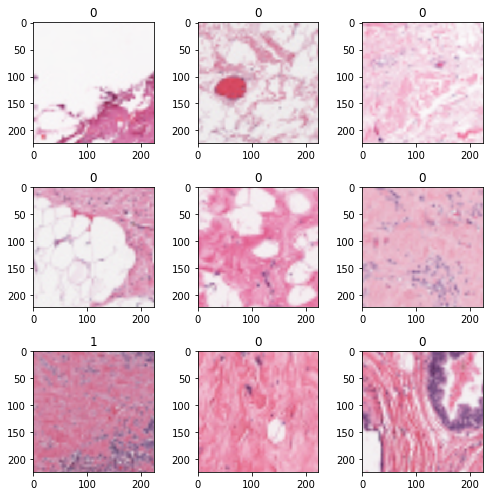

In [57]:
data.show_batch(rows=3, figsize=(7,7), hide_axis=False)

# Train model

In [58]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [59]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate


Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ubuntu/anaconda3/envs/fast

KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(learn=Learner, )